# Rating Prediction Project

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review. 

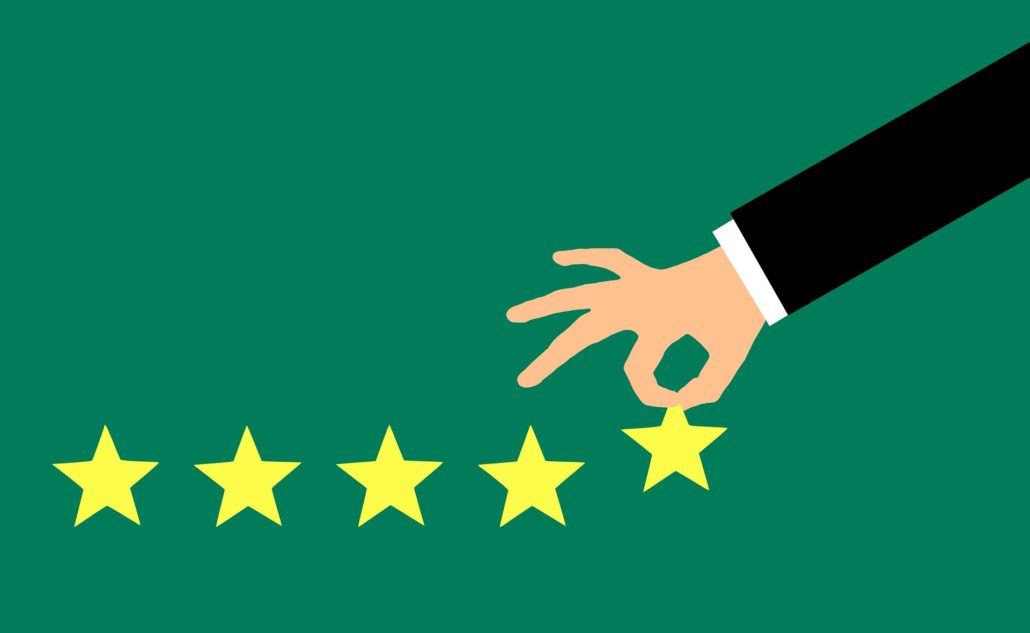

## Model Building Phase 

After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. 

Follow the complete life cycle of data science. 

Include all the steps like- 
1. Data Cleaning 
2. Exploratory Data Analysis 
3. Data Preprocessing 
4. Model Building 
5. Model Evaluation 
6. Selecting the best model 
 
 

### Import all needed libraries

In [95]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

# Importing nltk libraries
import re
import string
import missingno
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from scipy import stats
from scipy.stats import zscore
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

lemmatizer = nltk.stem.WordNetLemmatizer()

In [96]:
#load ratings dataset
df=pd.read_csv('ratings.csv')

In [97]:
df.head()

,Unnamed: 0,Review Title,Review Text,Rating
0,0,Super!,This is a good laptop and it's charging speed ...,5.0
1,1,Really Nice,Cons.\n1.Lite or Dim display colour in 1080p r...,4.0
2,2,Great product,Good,5.0
3,3,NaN,NaN,NaN
4,4,NaN,NaN,NaN


In [98]:
#check the shape of data set
df.shape

(5673, 4)

In [99]:
#check the all variable names
df.columns

Index(['Unnamed: 0', 'Review Title', 'Review Text', 'Rating'], dtype='object')

In [100]:
#check the datatype of all variables
df.dtypes

Unnamed: 0        int64
Review Title     object
Review Text      object
Rating          float64
dtype: object

In [101]:
#remove that Unnamed: 0 variable
df.drop('Unnamed: 0',axis=1,inplace=True)

### Exploratory Data Analysis

In [102]:
print('We have {} rows and {} columns in this dataset'.format(df.shape[0],df.shape[1]))
df.head(30)

We have 5673 rows and 3 columns in this dataset


,Review Title,Review Text,Rating
0,Super!,This is a good laptop and it's charging speed ...,5.0
1,Really Nice,Cons.\n1.Lite or Dim display colour in 1080p r...,4.0
2,Great product,Good,5.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,Delightful,This is thing I want to be...It s worked suprb...,4.0
8,Perfect product!,It's a very good choice in this price range .n...,5.0
9,Simply awesome,I writing review for this product after same d...,5.0


It looks like our dataframe has 5673 Rows and 3 Columns but we do observe some NaN values that will need to be removed to clean our dataset and make it free from missing values.

In [103]:
df.isnull().sum() # checking for missing values

Review Title    3808
Review Text     3808
Rating          3808
dtype: int64

Using the isnull and sum options together we can confirm that there some missing values in all the 3 columns of our dataset that will need to be treated.

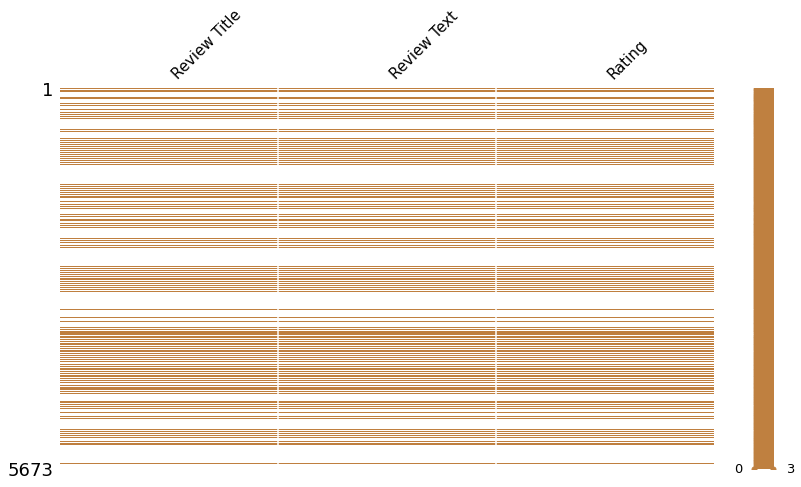

In [104]:
missingno.matrix(df,figsize=(13,7),color=(.75,.50,.25),fontsize=15);

Was just ensuring the missing data information with the help of a visual using missingno. We can see that the above white lines represent the NaN values present in our dataframe that will need to be removed.

In [105]:
print("We have {} Rows and {} Columns in our dataframe before removing Null values".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing Null values".format(df.shape[0], df.shape[1]))

We have 5673 Rows and 3 Columns in our dataframe before removing Null values
We have 1865 Rows and 3 Columns in our dataframe after removing Null values


In [106]:
df.isnull().sum()#check null values after removing

Review Title    0
Review Text     0
Rating          0
dtype: int64

In [107]:
df.info()#checking information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 0 to 5670
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Review Title  1865 non-null   object 
 1   Review Text   1865 non-null   object 
 2   Rating        1865 non-null   float64
dtypes: float64(1), object(2)
memory usage: 58.3+ KB


In [108]:
df['Rating'].unique()#checking unique of target variable

array([5., 4., 2., 1., 3.])

In [109]:
df['Rating'] = df['Rating'].replace('1.0',1)
df['Rating'] = df['Rating'].replace('2.0',2)
df['Rating'] = df['Rating'].replace('3.0',3)
df['Rating'] = df['Rating'].replace('4.0',4)
df['Rating'] = df['Rating'].replace('5.0',5)
df['Rating'] = df['Rating'].astype('int')
df['Rating'].unique() #After replacing

array([5, 4, 2, 1, 3])

In [110]:
df.columns

Index(['Review Title', 'Review Text', 'Rating'], dtype='object')

In [111]:
#Now combine the both Review Title and Review Text
df['Review']=df['Review Title'].map(str)+' '+df['Review Text']
df.head()

,Review Title,Review Text,Rating,Review
0,Super!,This is a good laptop and it's charging speed ...,5,Super! This is a good laptop and it's charging...
1,Really Nice,Cons.\n1.Lite or Dim display colour in 1080p r...,4,Really Nice Cons.\n1.Lite or Dim display colou...
2,Great product,Good,5,Great product Good
7,Delightful,This is thing I want to be...It s worked suprb...,4,Delightful This is thing I want to be...It s w...
8,Perfect product!,It's a very good choice in this price range .n...,5,Perfect product! It's a very good choice in th...


### Visualizing text in first two rows from the newly created "Review" column

In [112]:
df['Review'][0]

"Super! This is a good laptop and it's charging speed is fast and boot time is 3-5 seconds it takes\nVery good laptop don't think too much just go for it"

In [113]:
df['Review'][1]

'Really Nice Cons.\n1.Lite or Dim display colour in 1080p resolution while Online Video Streaming.\n2.Battery Backup is only 3 hours after normal uses but in description shows 9.5 hours.\n\nPros\n1.If you want to buy this Laptop for college or office purpose then buy.\n2.Best in this price segment🏆\n3.Window boot in 5 sec\n4. 8/512⚡️\n5.lite gaming and System Sound Game recording in 60fps.\n6.mircrosoft office student 2021 pre- installed(lifetime validity).'

### Text Processing to remove unwanted punctuations and special characters

In [114]:
'''Here I am defining a function to replace some of the contracted words to their full form and removing urls and some 
unwanted text'''

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Lowercasing the alphabets
df['Review'] = df['Review'].apply(lambda x : x.lower())
df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations from the review
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [115]:
# Removing all the stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### Visualizing text in first two rows after applying various text cleaning procedures

In [116]:
df['Review'][0]

'super good laptop charging speed fast boot time 35 seconds takes good laptop think much go'

In [117]:
df['Review'][1]

'really nice cons 1lite di amdisplay colour 1080p resolution online video streaming 2battery backup 3 hours normal uses description shows 95 hours pros 1if want buy laptop college office purpose buy 2best price segment 3window boot 5 sec 4 8512 5lite gaming system sound game recording 60fps 6mircrosoft office student 2021 pre installedlifetime validity'

## Lemmatization

In [118]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [119]:
df['Review'][0]

'super good laptop charge speed fast boot time 35 second take good laptop think much go'

In [120]:
df['Review'][1]

'really nice con 1lite di amdisplay colour 1080p resolution online video stream 2battery backup 3 hour normal us description show 95 hour pros 1if want buy laptop college office purpose buy 2best price segment 3window boot 5 sec 4 8512 5lite game system sound game record 60fps 6mircrosoft office student 2021 pre installedlifetime validity'

### Text Normalization - Standardization

In [121]:
# Noise removal function
def scrub_words(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [122]:
df['Review'][0]

'super good laptop charge speed fast boot time  second take good laptop think much go'

In [123]:
df['Review'][1]

'really nice con lite di amdisplay colour p resolution online video stream battery backup  hour normal us description show  hour pros if want buy laptop college office purpose buy best price segment window boot  sec   lite game system sound game record fps mircrosoft office student  pre installedlifetime validity'

### Word Counts

In [124]:
# Creating column for word counts in the review text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC', 'Review']].head()

,Review_WC,Review
0,16,super good laptop charge speed fast boot time ...
1,54,really nice con lite di amdisplay colour p res...
2,3,great product good
7,13,delightful thing want beit work suprb fast due...
8,32,perfect product good choice price range nice d...


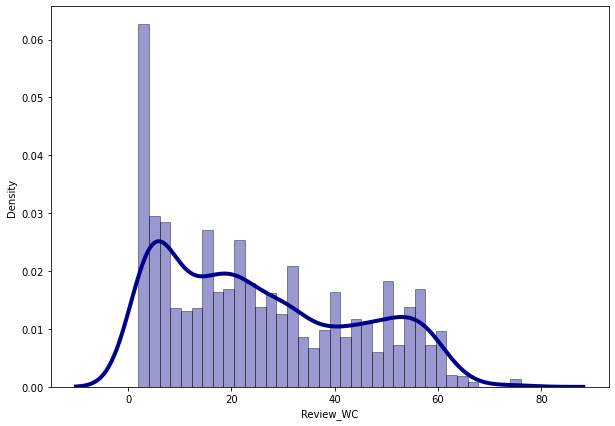

In [125]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

### Character Counts

In [126]:
# Creating column for character counts in the review text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head()

,Review_CC,Review
0,84,super good laptop charge speed fast boot time ...
1,313,really nice con lite di amdisplay colour p res...
2,18,great product good
7,75,delightful thing want beit work suprb fast due...
8,199,perfect product good choice price range nice d...


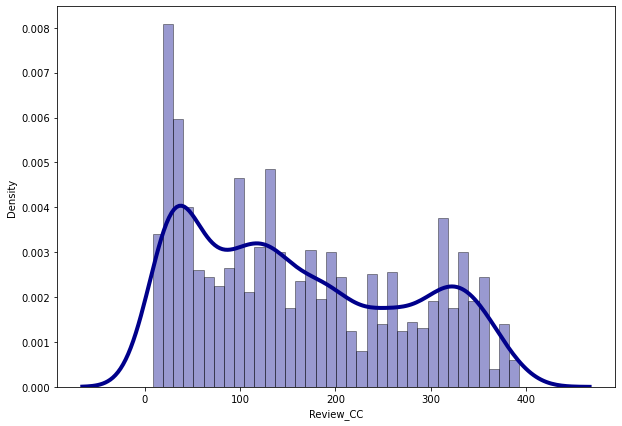

In [127]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

### Removing Outliers

In [128]:
# Applying zscore to remove outliers
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
print("We have {} Rows and {} Columns in our dataframe after removing outliers".format(df.shape[0], df.shape[1]))

We have 1865 Rows and 6 Columns in our dataframe after removing outliers


### Plotting histograms for word count and character count again after removing the outliers

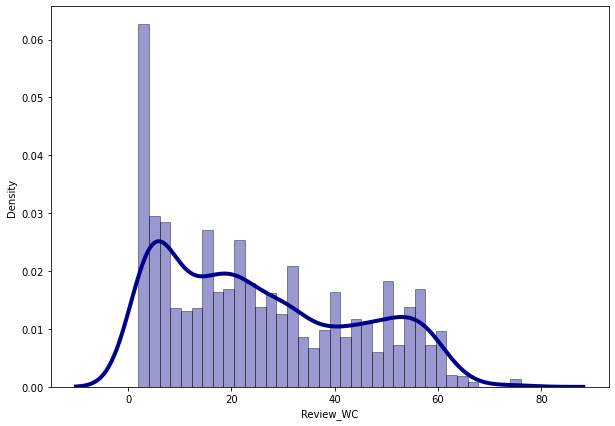

In [129]:
# Density plot and histogram of all word count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

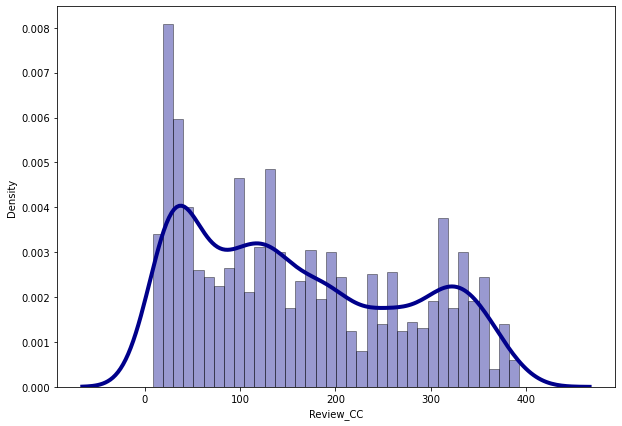

In [130]:
# Density plot and histogram of all character count
plt.figure(figsize=(10,7))
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

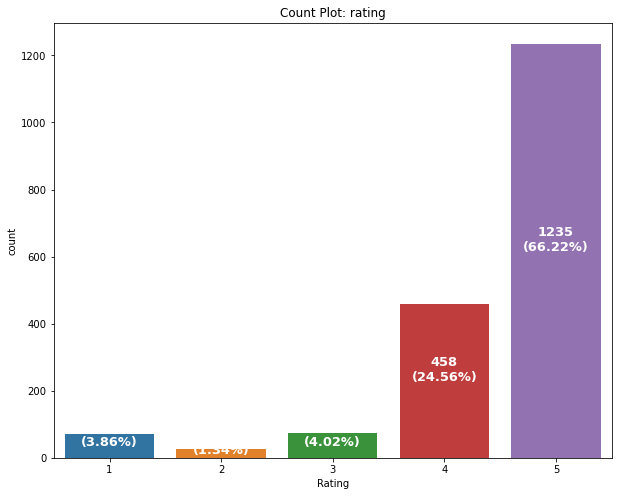

In [131]:
# Checking the ratings column details using count plot
x = 'Rating'
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=x,data=df,ax=ax)
p=0
for i in ax.patches:
    q = i.get_height()/2
    val = i.get_height()
    ratio = round(val*100/len(df),2)
    prn = f"{val}\n({ratio}%)"
    ax.text(p,q,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    p += 1
    
plt.title("Count Plot: rating")
plt.show()


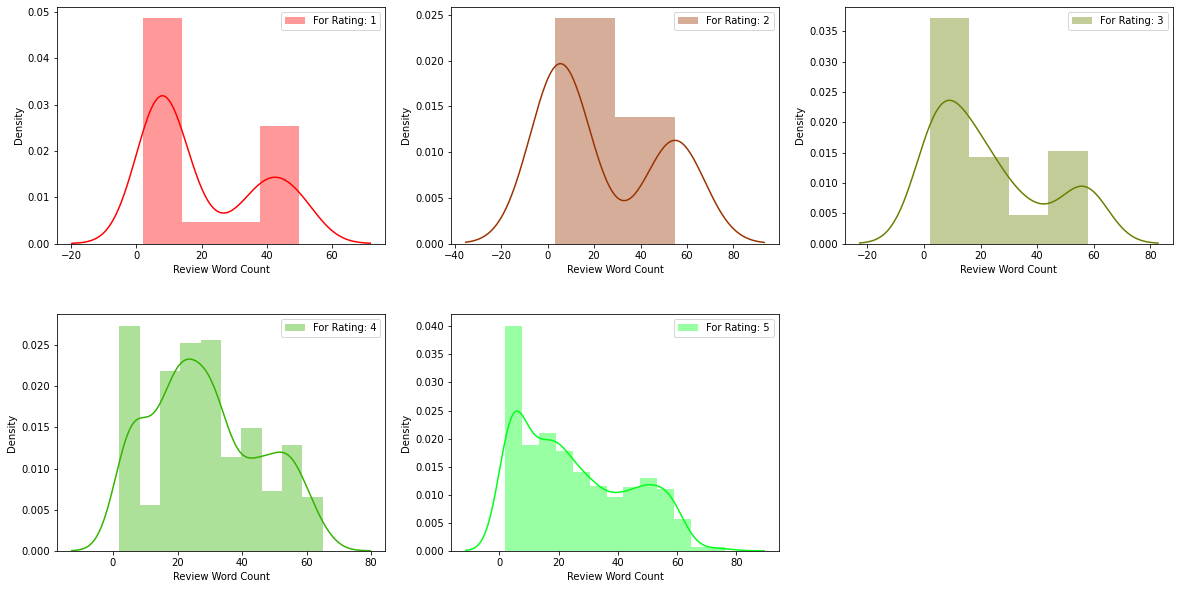

In [132]:
# Checking review word count distribution for each rating
ratings = np.sort(df.Rating.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_WC[df.Rating==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    p += 1
    
plt.show()

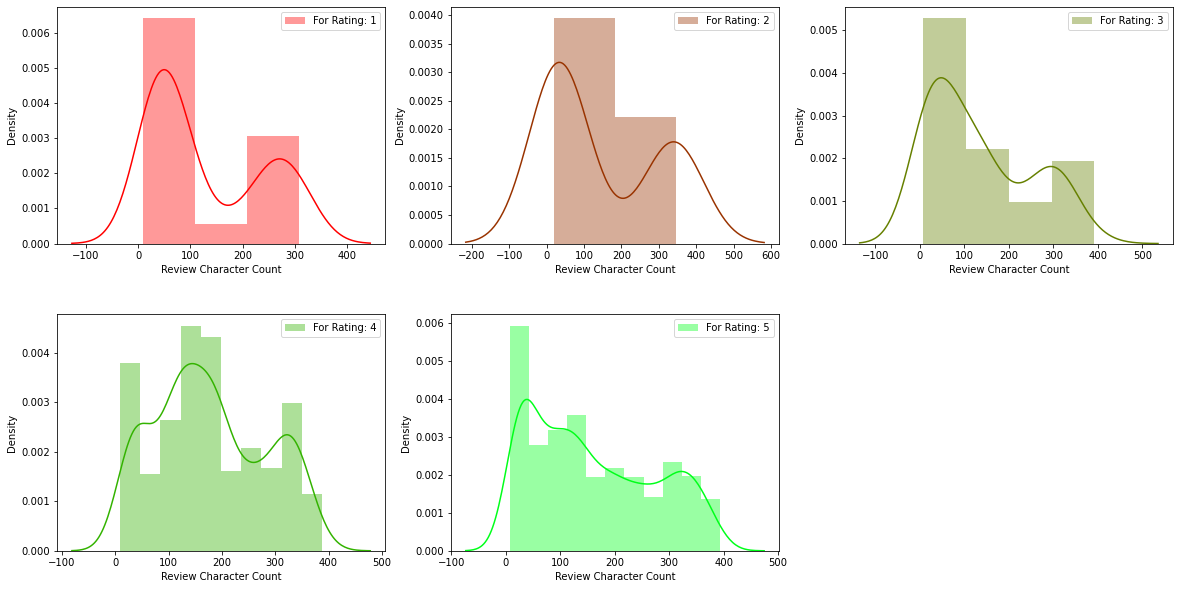

In [133]:
# Checking review character count distribution for each rating
ratings = np.sort(df.Rating.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
p = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,p)
    sns.distplot(df.Review_CC[df.Rating==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    p += 1
    
plt.show()

### Displaying loud words with Word Cloud information

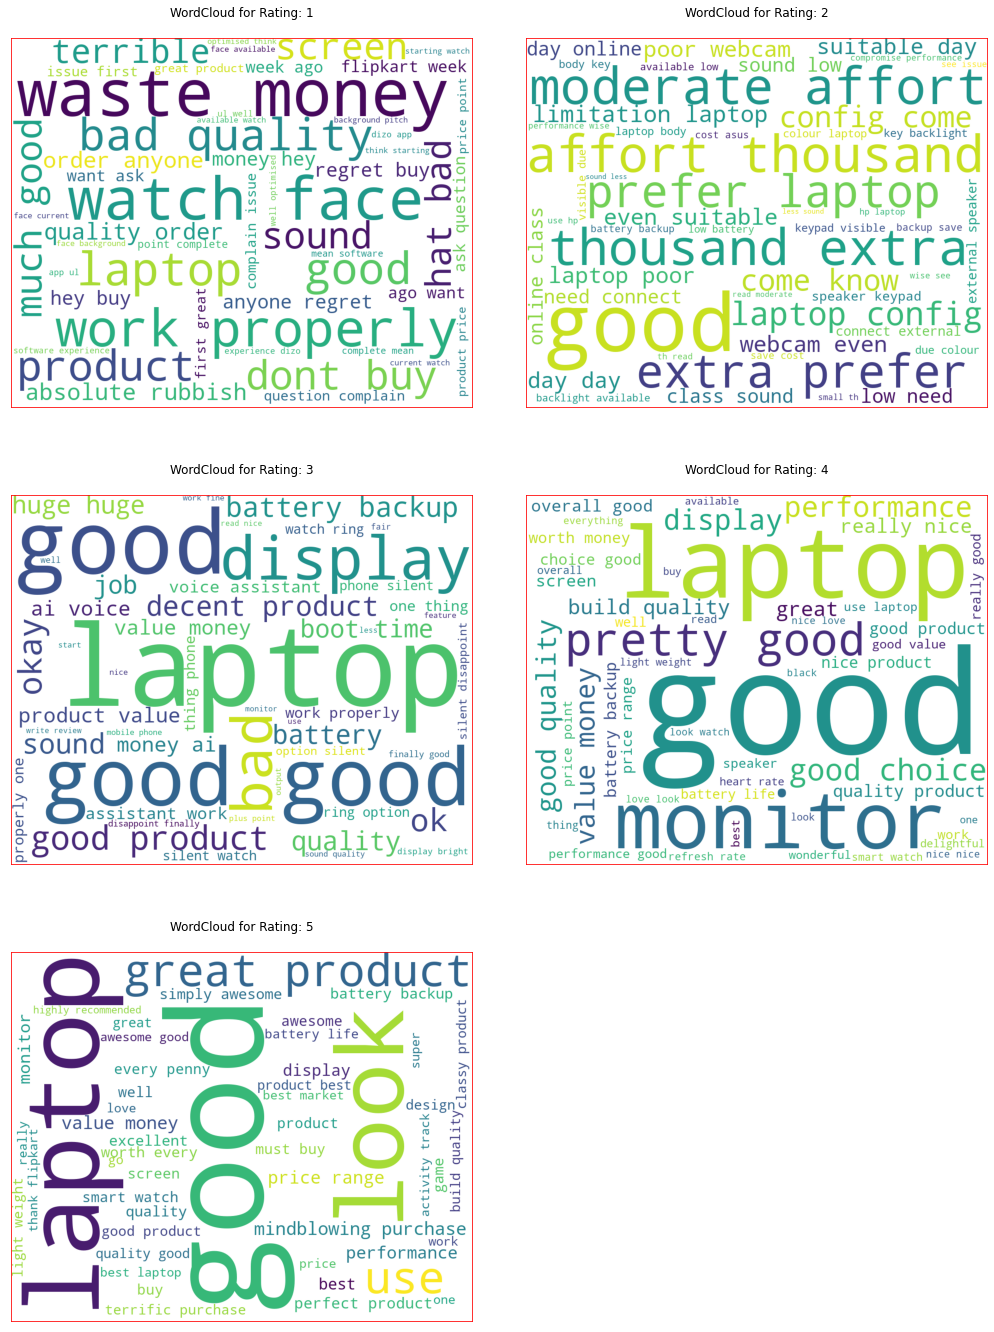

In [134]:
# Getting insight of loud words in each rating
cols = 2
ratings = np.sort(df.Rating.unique())
rows = len(ratings)//2
if len(ratings) % cols != 0:
    rows += 1    
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)
p = 1
for i in ratings:
    word_cloud = WordCloud(height=800, width=1000, background_color="white", max_words=50).generate(' '.join(df.Review[df.Rating==i]))
    axis = fig.add_subplot(rows,cols,p)
    axis.set_title(f"WordCloud for Rating: {i}\n")
    axis.imshow(word_cloud)
    for spine in axis.spines.values():
        spine.set_edgecolor('r')
    axis.set_xticks([])
    axis.set_yticks([])
    
    plt.tight_layout(pad=5)
    p += 1    
plt.show()

5    1235
4     458
3      75
1      72
2      25
Name: Rating, dtype: int64


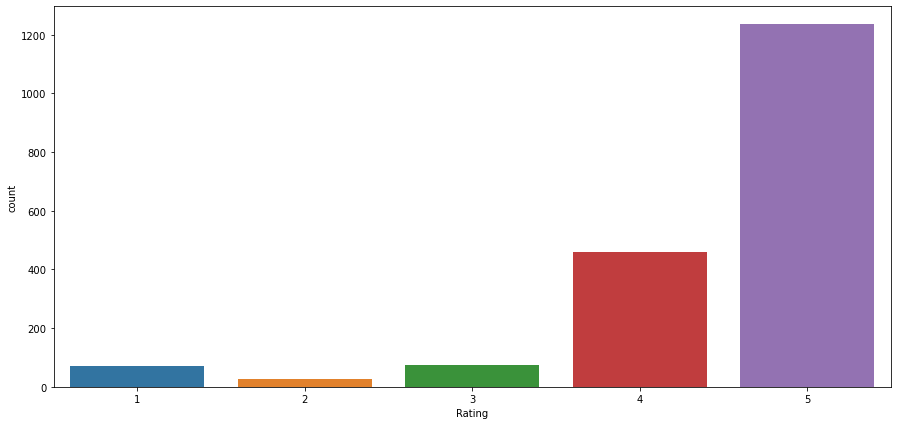

In [135]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Rating'])
print(df.Rating.value_counts())
plt.show()

In [136]:
# shuffling the entire data set
df = df.sample(frac=1).reset_index(drop=True)
df

,Review Title,Review Text,Rating,Review,Review_WC,Review_CC
0,Awesome,Pros\n*Watch is very light and comfortable\n*N...,5,awesome pro watch light comfortable notificati...,50,336
1,Classy product,Amazing quality.\nSpeakers are just awesome. B...,5,classy product amazing quality speaker awesome...,19,119
2,Perfect product!,Very nice 🙂 love it ❤️🙂 thank u flipkart 😁❤️,5,perfect product nice love thank u flipkart,7,42
3,Highly recommended,Superb Laptop & best service\n\n\n\n\nThankuu ...,5,highly recommended superb laptop best service ...,8,62
4,Wonderful,Awesome product and performance,4,wonderful awesome product performance,4,37
...,...,...,...,...,...,...
1860,Just wow!,Got this 2 days back for 38k and it's a great ...,5,wow get day back k great budget laptop look h...,47,243
1861,Brilliant,Let's get into a detailed review:\n\nLooks: 10...,5,brilliant let get detailed review look qualit...,26,158
1862,Perfect product!,Setting has to be done even after pairing for ...,5,perfect product set do even pair call notifica...,26,164
1863,Really Nice,Cons.\n1.Lite or Dim display colour in 1080p r...,4,really nice con lite di amdisplay colour p res...,54,313


### Top 30 most frequently occuring words

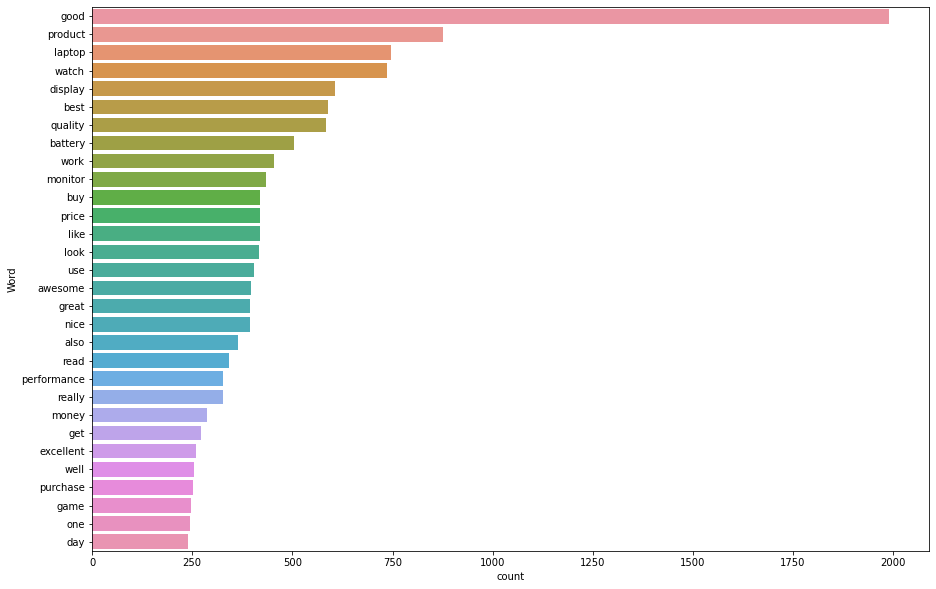

In [137]:
# Function to plot most frequent terms in our Review column
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 most frequent words
    dt = words_df.nlargest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df['Review'])  

### Top 30 rarely occuring words

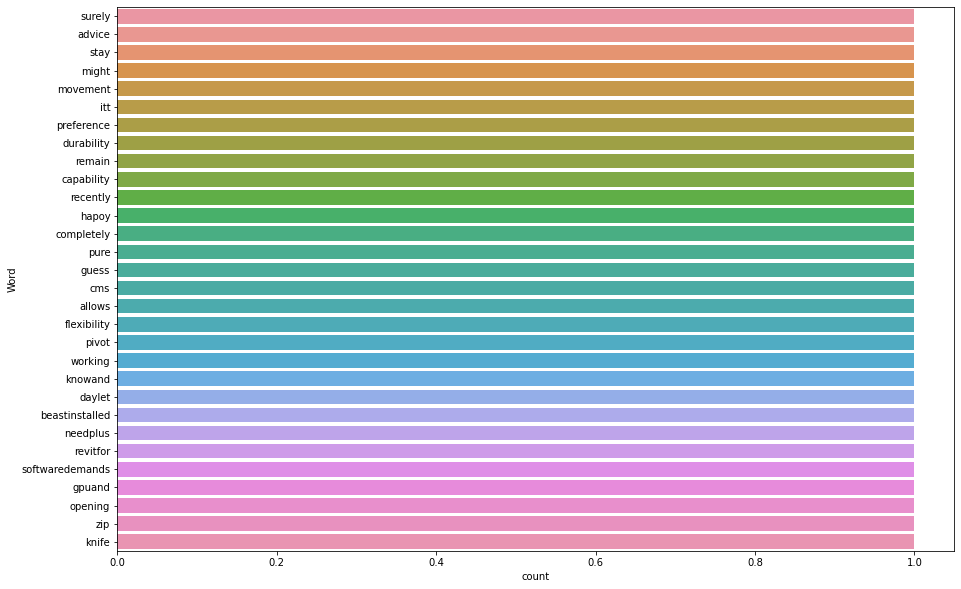

In [145]:
# Function to plot least frequent terms in our Review column
def rare_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # selecting top 30 least freq rare words
    dt = words_df.nsmallest(columns='count', n=terms)
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=dt, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
rare_words(df['Review'])  

## Model Building and Evaluation Metrics

In [146]:
# Separating features and labels here
x = df['Review']
y = df['Rating']

### Converting text into vectors using TfidfVectorizer

In [147]:
# Using the n_gram tfidf vectorizer (Word vectors)
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern = r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1,3),
                                  max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

# Character vectors
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2,6),
                                  max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

# I will now combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features, train_word_features])

### Splitting the data into train and test datasets

In [151]:
state = 42
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (1305, 72092)
x_test (560, 72092)
y_train (1305,)
y_test (560,)


In [154]:
# Defining the Classification Machine Learning Algorithms
rf = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
sgd = SGDClassifier()

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [155]:
for model in [lr,svc,bnb,mnb,sgd,rf]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 93.39285714285714
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       1.00      0.67      0.80        18
           2       1.00      0.50      0.67         6
           3       1.00      0.75      0.86        24
           4       1.00      0.84      0.91       136
           5       0.91      1.00      0.95       376

    accuracy                           0.93       560
   macro avg       0.98      0.75      0.84       560
weighted avg       0.94      0.93      0.93       560

CONFUSION MATRIX: 
 [[ 12   0   0   0   6]
 [  0   3   0   0   3]
 [  0   0  18   0   6]
 [  0   0   0 114  22]
 [  0   0   0   0 376]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURACY SCORE PERCENTAGE: 96.07

### Cross validation score for best score models

In [156]:
# I am checking cross-validation score only for those algorithms which are giving us better accuracies

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,sgd,rf]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 94.47671960137592


******************************LinearSVC******************************
Cross validation score: 96.9968570555737


******************************SGDClassifier******************************
Cross validation score: 97.10395189448269


******************************RandomForestClassifier******************************
Cross validation score: 96.19239445419603




### HyperParameter Tuning

In [157]:
# Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(rf, grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.949 total time=   3.6s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.915 total time=   7.9s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=100;, score=0.940 total time=   5.2s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.947 total time=   8.1s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.917 total time=  13.5s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=500, n_estimators=200;, score=0.938 total time=  11.7s
[CV 1/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.947 total time=   3.6s
[CV 2/3] END bootstrap=True, criterion=gini, max_depth=800, n_estimators=100;, score=0.915 total time=   6.5s
[CV 3/3] END bootstrap=True, criterion=gini, max_depth=800,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [158]:
GSCV.best_params_ # Selecting the best parameters found by GridSearchCV

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 800,
 'n_estimators': 200}

In [159]:
# Final Model with the best chosen parameters list
best_model = RandomForestClassifier(bootstrap=False, criterion="gini", max_depth=800, n_estimators=200)
best_model.fit(x_train,y_train) # fitting data to the best model
pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 94.64285714285714

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       1.00      0.67      0.80         6
           3       1.00      0.92      0.96        24
           4       0.98      0.85      0.91       136
           5       0.93      0.99      0.96       376

    accuracy                           0.95       560
   macro avg       0.97      0.85      0.90       560
weighted avg       0.95      0.95      0.95       560


CONFUSION MATRIX: 
 [[ 15   0   0   0   3]
 [  0   4   0   0   2]
 [  1   0  22   0   1]
 [  0   0   0 115  21]
 [  0   0   0   2 374]]


### Save the model

In [161]:
joblib.dump(best_model, "Rating_Prediction_Saved_Model.pkl")

['Rating_Prediction_Saved_Model.pkl']

In [163]:
Model = joblib.load("Rating_Prediction_Saved_Model.pkl")#load the model

In [164]:
# Predicting test data using loaded model
prediction = Model.predict(x_test)
# Analysing Predicted vs Actual results
results = pd.DataFrame()
results['Predicted Review Ratings'] = prediction
results['Actual Review Ratings'] = y
results

,Predicted Review Ratings,Actual Review Ratings
0,5,5
1,5,5
2,5,5
3,5,5
4,4,4
...,...,...
555,5,4
556,5,5
557,5,5
558,5,5
